# MNIST Example

In [1]:
# You dont need this, this is for my convinience
import sys
import os
notebook_dir = '\\'.join(os.getcwd().split('\\')[:-1])
sys.path.append(notebook_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nervos.utils import Module, Parameters
from nervos.dataloader import MNISTLoader

In [3]:
p = Parameters()
p.from_url('https://pastebin.com/raw/X9fAjKGR')

In [4]:
class MNIST_SNN(Module):
    def __init__(self, parameters, identifier=None):
        super().__init__(parameters, identifier)
        self.dataloader = MNISTLoader(parameters, classes=[i for i in range(5)])
        self.X_train, self.Y_train = self.dataloader.dataloader(
            preprocess=True, pca=False, size=100
        )
        self.X_test, self.Y_test = self.dataloader.dataloader(
            preprocess=True, train=False, pca=False
        )
    def predict(self, un_processed_image, model_location):
        spike_train = np.array(self.dataloader.img2spiketrain(un_processed_image))
        synapses, neuron_label_map = self.load_model(model_location)
        return self.get_prediction(spike_train, synapses, neuron_label_map)

In [6]:
m = MNIST_SNN(p,"5classmnist")
m.initialise_layers([784,80])
y = m.train()

Epoch 1/3
100/100 [========================================]
Testing...
Test set accuracy: 0.7
Time elapsed since training start: 139.892s
Epoch 2/3
100/100 [========================================]
Testing...
Test set accuracy: 0.95
Time elapsed since training start: 279.372s
Epoch 3/3
100/100 [========================================]
Testing...
Test set accuracy: 1.0
Time elapsed since training start: 414.278s
Training complete!


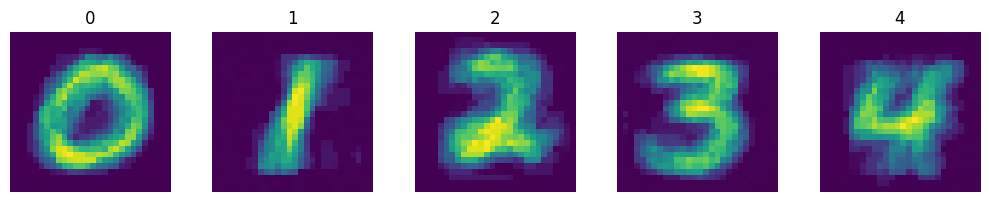

In [7]:
def visualise_synapse(synapses,labels):
    kk=28
    classes = {i:np.zeros((kk,kk)) for i in np.unique(labels)}
    for idx in range(len(synapses)):
        classes[labels[idx]]+= synapses[idx].reshape((kk,kk))
    
    i = 1
    plt.figure(figsize=(10,30))
    for k in classes.keys():
        plt.subplot(1,len(classes),i)
        plt.imshow(classes[k])
        plt.title(f"{k}")
        plt.tight_layout()
        plt.axis('off')
        i+=1
    plt.show()
    
visualise_synapse(m.learned_synapses[0],m.learned_neuron_label_map)

In [8]:
def accuracy(m2):
    spike_trains,labels = MNISTLoader(p,classes=[i for i in range(5)]).dataloader(train=False,preprocess=True,seed=123,size=1500)
    t = 0
    c = 0
    preds = []
    print('Calculating Accuracy')
    for st,label in zip(spike_trains,labels):
        pred = m2.get_prediction(st)
        preds.append(pred)
        if pred == label:
            c+=1
        t+=1
        
        print(f"\rTested {t} images",end='')
    print()
    print(c/t)
    return labels,preds

y_true,y_pred = accuracy(m)

Calculating Accuracy
Tested 1500 images
0.9153333333333333
